In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
model_gd = create_model()
model_gd.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
4/4 [==============================] - 1s 129ms/step - loss: 1.1852 - accuracy: 0.1917 - val_loss: 1.1346 - val_accuracy: 0.2000
Epoch 2/10
4/4 [==============================] - 0s 28ms/step - loss: 1.1511 - accuracy: 0.1917 - val_loss: 1.1094 - val_accuracy: 0.2667
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 1.1240 - accuracy: 0.2583 - val_loss: 1.0887 - val_accuracy: 0.3000
Epoch 4/10
4/4 [==============================] - 0s 42ms/step - loss: 1.1021 - accuracy: 0.3750 - val_loss: 1.0691 - val_accuracy: 0.4667
Epoch 5/10
4/4 [==============================] - 0s 63ms/step - loss: 1.0817 - accuracy: 0.4833 - val_loss: 1.0504 - val_accuracy: 0.6000
Epoch 6/10
4/4 [==============================] - 0s 37ms/step - loss: 1.0627 - accuracy: 0.5667 - val_loss: 1.0324 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 0s 29ms/step - loss: 1.0444 - accuracy: 0.6167 - val_loss: 1.0154 - val_accuracy: 0.6667
Epoch 8/10
4/4 [==========

In [8]:
model_sgd = create_model()
model_sgd.fit(X_train_scaled, y_train, epochs=10, batch_size=1, validation_data=(X_test_scaled, y_test))



Epoch 1/10
120/120 [==============================] - 1s 4ms/step - loss: 0.8233 - accuracy: 0.6333 - val_loss: 0.5988 - val_accuracy: 0.8667
Epoch 2/10
120/120 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.8250 - val_loss: 0.4189 - val_accuracy: 0.9000
Epoch 3/10
120/120 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8250 - val_loss: 0.3261 - val_accuracy: 0.9333
Epoch 4/10
120/120 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8750 - val_loss: 0.2674 - val_accuracy: 0.9000
Epoch 5/10
120/120 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8667 - val_loss: 0.2191 - val_accuracy: 0.9667
Epoch 6/10
120/120 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9167 - val_loss: 0.2009 - val_accuracy: 0.9000
Epoch 7/10
120/120 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9000 - val_loss: 0.1653 - val_accuracy: 0.9667
Epoch 

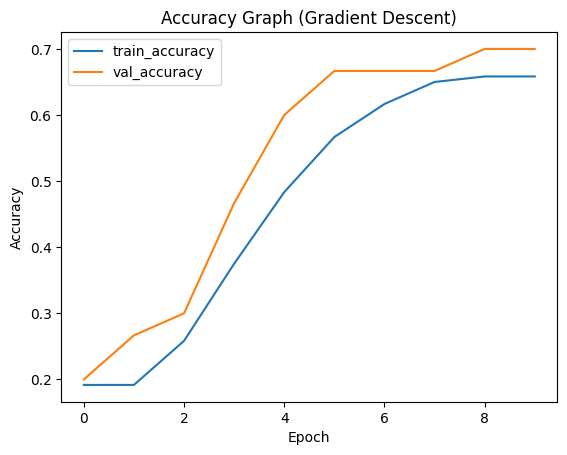

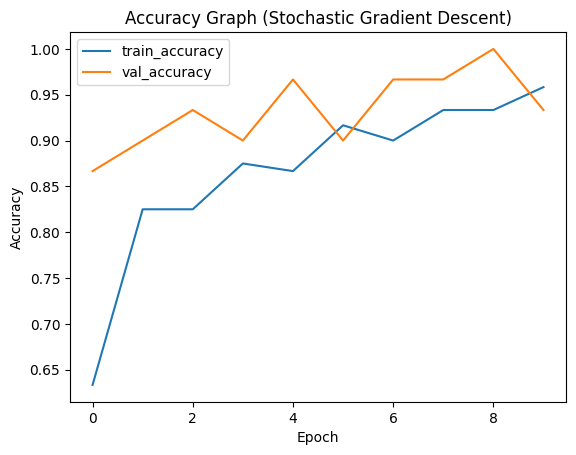

In [9]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(model_gd.history, "Accuracy Graph (Gradient Descent)")

plot_accuracy(model_sgd.history, "Accuracy Graph (Stochastic Gradient Descent)")
